In [1]:
# utilities
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
# Importing the dataset
DATASET_COLUMNS=['Id','Topic','Intent','Tweet']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('twitter_training.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,Id,Topic,Intent,Tweet
59713,3435,Facebook,Negative,The fact that Mark Zuckerberg is backing Trump...
34830,6782,Fortnite,Irrelevant,Anyone wanna trade drop boxes .
42988,10175,PlayerUnknownsBattlegrounds(PUBG),Irrelevant,. the @BLACKPINK
29599,690,ApexLegends,Negative,@ PlayApex so y'all fr just don't care how awf...
48498,5926,HomeDepot,Neutral,STOP THEYRE STEAL MY GIRL IN THE HOME DEPOT BY...


In [3]:
df.head()

,Id,Topic,Intent,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
df.tail()

,Id,Topic,Intent,Tweet
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [5]:
df.describe()

,Id
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [6]:
print('length of data is', len(df))

length of data is 74682


In [7]:
df.shape

(74682, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      74682 non-null  int64 
 1   Topic   74682 non-null  object
 2   Intent  74682 non-null  object
 3   Tweet   73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


# Data Pre-processing

In [9]:
df.isnull().sum()

Id          0
Topic       0
Intent      0
Tweet     686
dtype: int64

In [10]:
#Check the number of unique id values
print("Total Number of Users = ",len(df['Id'].unique()))

Total Number of Users =  12447


In [11]:
# Check the number of unique Topics
print("Total Number of Topics = ",len(df['Topic'].unique()))

Total Number of Topics =  32


## Changing the Intent
Positive = 1      
Negative = -1      
Neutral = 0      
Irrelevant = -      

In [12]:
df = df.replace(to_replace ="Positive",
                 value =1)
df = df.replace(to_replace ="Negative",
                 value =-1)
df = df.replace(to_replace ="Neutral",
                 value =0)
df = df.replace(to_replace ="Irrelevant",
                 value = '')


In [13]:
# Updated Dataframe
df

,Id,Topic,Intent,Tweet
0,2401,Borderlands,1,im getting on borderlands and i will murder yo...
1,2401,Borderlands,1,I am coming to the borders and I will kill you...
2,2401,Borderlands,1,im getting on borderlands and i will kill you ...
3,2401,Borderlands,1,im coming on borderlands and i will murder you...
4,2401,Borderlands,1,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,1,Just realized that the Windows partition of my...
74678,9200,Nvidia,1,Just realized that my Mac window partition is ...
74679,9200,Nvidia,1,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,1,Just realized between the windows partition of...


## Checking the missing values

In [14]:
#missing data 
missing_fractions = df.isnull().mean().sort_values(ascending=False)
missing_fractions.head(10)

Tweet     0.009186
Intent    0.000000
Topic     0.000000
Id        0.000000
dtype: float64

Text(0, 0.5, 'Feature count')

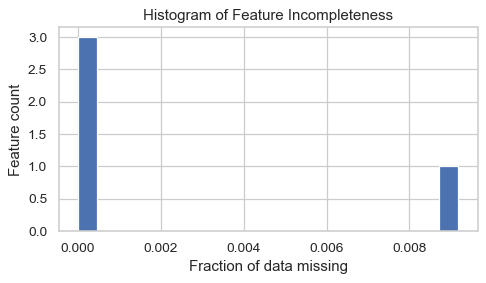

In [15]:
mpl.style.use('ggplot')
sns.set(style='whitegrid')
plt.figure(figsize=(6,3), dpi=90)
missing_fractions.plot.hist(bins=20)
plt.title('Histogram of Feature Incompleteness')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count')

In [16]:
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
print(drop_list)
print("\n\n Drop Features: ", len(drop_list))

[]


 Drop Features:  0


## Dropping the extra Column

In [17]:
df.drop(labels=["Tweet"], axis=1, inplace=True)

In [18]:
# Updated Dataframe
df

,Id,Topic,Intent
0,2401,Borderlands,1
1,2401,Borderlands,1
2,2401,Borderlands,1
3,2401,Borderlands,1
4,2401,Borderlands,1
...,...,...,...
74677,9200,Nvidia,1
74678,9200,Nvidia,1
74679,9200,Nvidia,1
74680,9200,Nvidia,1


In [19]:
print("Total Number of Users = ",len(df['Id'].unique()))

Total Number of Users =  12447


In [20]:
print("Total Number of Topics = ",len(df['Topic'].unique()))

Total Number of Topics =  32


## Training
